In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import src.data_handler as data_handler
import src.models as models
import os
from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

## 1 )

### a )

In [2]:
clustering_df : pd.DataFrame = pd.read_csv(f"{project_root}/TP04/data/raw/clustering.csv").drop(columns=['index'])
clustering_df.info()
clustering_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       4999 non-null   int64
 1   B       4999 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


,A,B
0,812954,643720
1,868217,609046
2,920248,607272
3,841621,639394
4,843907,598777


In [3]:
# clustering_normalized_df : pd.DataFrame = clustering_df / clustering_df.max()
# clustering_normalized_df.info()
# clustering_normalized_df.head()
# clustering_normalized_df.to_csv(f"{project_root}/TP04/data/processed/clustering_normalized.csv")

In [4]:
X : np.ndarray = clustering_df.to_numpy()
k_means_01 : models.KMeans = models.KMeans(X, 9)
k_means_01.fit_centroids(print_iterations=True, runs=20)
print("")
print("CENTROIDES")
for c, i in zip(k_means_01.mu, range(1, len(k_means_01.mu) + 1)):
    print(f"Cluster = {i:02d} | A: {c[0]}, B: {c[1]}")

K-MEANS: done at iteration  13
K-MEANS: done at iteration  15
K-MEANS: done at iteration  17
K-MEANS: done at iteration  21
K-MEANS: done at iteration  15
K-MEANS: done at iteration  22
K-MEANS: done at iteration  20
K-MEANS: done at iteration  29
K-MEANS: done at iteration  15
K-MEANS: done at iteration  19
K-MEANS: done at iteration  20
K-MEANS: done at iteration  24
K-MEANS: done at iteration  12
K-MEANS: done at iteration  22
K-MEANS: done at iteration  10
K-MEANS: done at iteration  19
K-MEANS: done at iteration  13
K-MEANS: done at iteration  18
K-MEANS: done at iteration  16
K-MEANS: done at iteration  16

CENTROIDES
Cluster = 01 | A: 459401, B: 199226
Cluster = 02 | A: 734597, B: 195847
Cluster = 03 | A: 568850, B: 787475
Cluster = 04 | A: 349201, B: 683524
Cluster = 05 | A: 736254, B: 491034
Cluster = 06 | A: 156898, B: 236944
Cluster = 07 | A: 208179, B: 474552
Cluster = 08 | A: 455773, B: 414498
Cluster = 09 | A: 818761, B: 726042


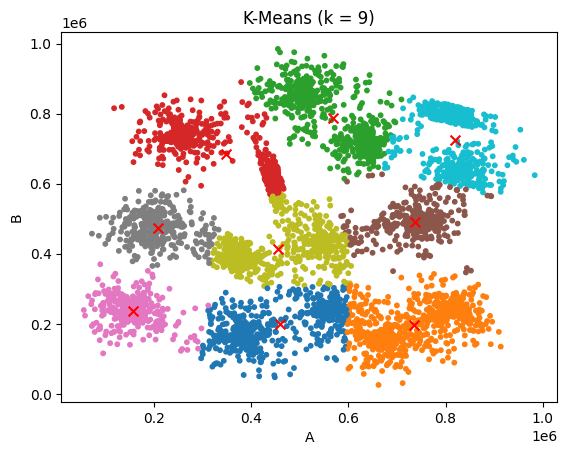

In [5]:
k_means_01.plot_clusters_2d()

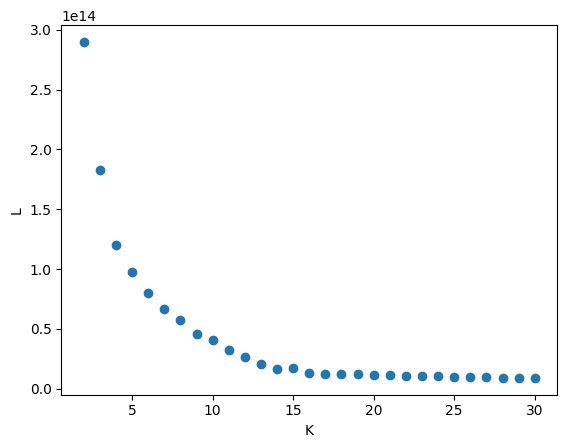

In [6]:
k_max : int = 30
k_model : models.KMeans
losses_k : list[float] = []
valores_k : list[int] = list(range(2, k_max+1))
for k in range(2, k_max + 1):
    k_model = models.KMeans(X, k)
    k_model.fit_centroids(runs=5)
    losses_k.append(k_model.calculate_distance_squared_error())
plt.scatter(range(2, k_max+1), losses_k)
plt.xlabel("K")
plt.ylabel("L")
plt.show()

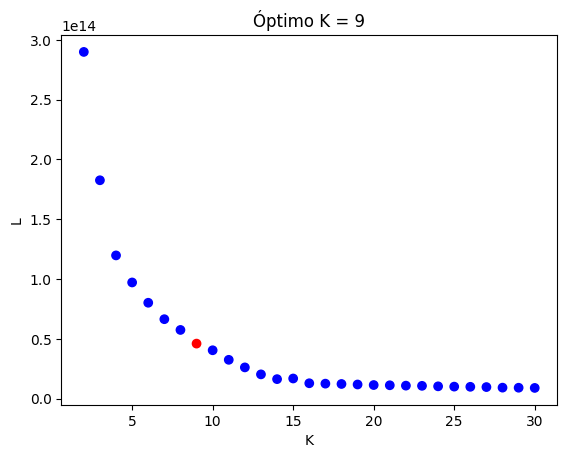

In [7]:
valores_k_np = np.array(valores_k)
losses_k_np = np.array(losses_k)

p1 = np.array([valores_k_np[0], losses_k_np[0]])
p2 = np.array([valores_k_np[-1], losses_k_np[-1]])
line_vec = p2 - p1
line_vec_norm = line_vec / np.linalg.norm(line_vec)

def distance_to_line(p):
    vec = p - p1
    proj = np.dot(vec, line_vec_norm) * line_vec_norm
    return np.linalg.norm(vec - proj)

distances = np.array([distance_to_line(np.array([valores_k_np[i], losses_k_np[i]])) for i in range(len(valores_k_np))])
k_opt = valores_k_np[np.argmax(distances)]

colors : list[float] = ['red' if k == k_opt else 'blue' for k in valores_k_np]

plt.scatter(valores_k_np, losses_k_np, c=colors)
plt.xlabel("K")
plt.ylabel("L")
plt.title(f"Óptimo K = {k_opt}")
plt.show()


### b )

In [8]:
X : np.ndarray = clustering_df.to_numpy()
gmm_model : models.GMM = models.GMM(X, 14)
gmm_model.fit_gaussians(use_k_means_centroids=True, max_iterations=10000, runs=20, print_iterations=True);
# print("\nCENTROIDES")
# for c, i in zip(mu, range(1, len(mu) + 1)):
#     print(f"Cluster = {i:02d} | A: {c[0]}, B: {c[1]}")

GMM: done at iteration 159
GMM: done at iteration 333
GMM: done at iteration 333
GMM: done at iteration 332
GMM: done at iteration 211
GMM: done at iteration 159
GMM: done at iteration 333
GMM: done at iteration 333
GMM: done at iteration 333
GMM: done at iteration 333
GMM: done at iteration 332
GMM: done at iteration 333
GMM: done at iteration 256
GMM: done at iteration 333
GMM: done at iteration 333
GMM: done at iteration 330
GMM: done at iteration 333
GMM: done at iteration 333
GMM: done at iteration 333
GMM: done at iteration 333


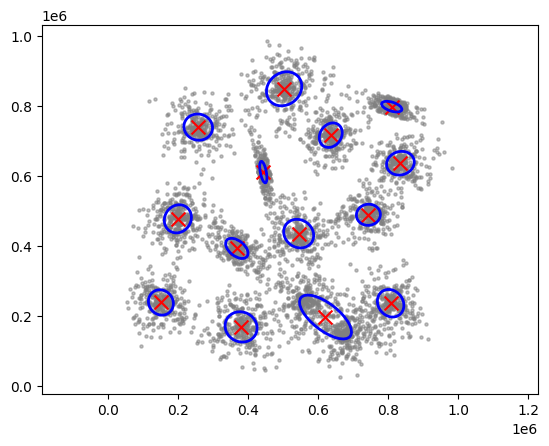

In [9]:
gmm_model.plot_gmm()

### c )

In [10]:
X : np.ndarray = clustering_df.to_numpy()
dbscan_model : models.DBScan = models.DBScan(X)
dbscan_model.fit_labels(epsilon=50000, min_points=5, print_iterations=True)

{(np.int64(812954), np.int64(643720)): 1,
 (np.int64(868217), np.int64(609046)): 1,
 (np.int64(920248), np.int64(607272)): 1,
 (np.int64(841621), np.int64(639394)): 1,
 (np.int64(843907), np.int64(598777)): 1,
 (np.int64(817712), np.int64(620917)): 1,
 (np.int64(865980), np.int64(632292)): 1,
 (np.int64(876539), np.int64(639944)): 1,
 (np.int64(805247), np.int64(642901)): 1,
 (np.int64(829227), np.int64(565484)): 1,
 (np.int64(834679), np.int64(669557)): 1,
 (np.int64(851242), np.int64(630615)): 1,
 (np.int64(890325), np.int64(702688)): 1,
 (np.int64(832159), np.int64(638667)): 1,
 (np.int64(833736), np.int64(637738)): 1,
 (np.int64(778784), np.int64(571492)): 1,
 (np.int64(844489), np.int64(672382)): 1,
 (np.int64(825802), np.int64(638894)): 1,
 (np.int64(875471), np.int64(622426)): 1,
 (np.int64(879225), np.int64(639387)): 1,
 (np.int64(819482), np.int64(633447)): 1,
 (np.int64(818212), np.int64(633262)): 1,
 (np.int64(839324), np.int64(651033)): 1,
 (np.int64(817439), np.int64(67807